# Detección de fallas en Paneles Solares a patir de imágenes termográficas

Integrantes 
* Andrés Alejandro Caipa Aldana (Ing. Sistemas e informática)
* Kevin Danilo Martinez Fernandez (Ing. Eléctrica)
* Angie Tatiana Serna Tavera (Ing. Control)

### Descripción 
Los paneles solares en ocasiones presentan fallas en las celdas, estas celdas dañadas constituyen una resistencia eléctrica interna que provoca un calentamiento indeseado, también conocidos como punto caliente.[1]. Los puntos calientes son áreas de temperaturas elevadas que con el paso del tiempo deterioran los materiales del área afectada, ocasionando una disminución en el rendimiento del panel, dado que las celdas dañadas pasan de generar energía eléctrica a consumirla. Además, debido a las altas temperaturas pueden generar riesgo de incendio.

Las formas por las que se puede presentar esta falla varían y entre ellas está la parte funcional, donde las corrientes pueden ocasionar el daño en la celda,  e inclusive el daño puede producirse desde la etapa de la fabricación de los paneles donde las celdas son sometidas a diferentes esfuerzos. Otro motivs por los que se genera el daño en la celda es durante el transporte e instalación del panel, las condiciones del techo o el espacio donde se instale son factores que pueden dañar las celdas. 

### Variables del problema

El análisis y procesamiento de las imágenes dependerá de cómo se tome la fotografía a los paneles, así para tener una imagen idónea para el análisis y procesamiento, se desean fotografías que las fotografías sean tomadas con un ángulo de inclinación específico respecto a los módulos fotovoltaicos, con el fin de capturar una completa distribución de la temperatura. Sin embargo, no es posible obtener todas las  imágenes con esta especificación. Adicionalmente, cuando las fotografías son tomadas por personas en vez de por vehículos aéreos no tripulados, es posible apreciar en cierta medida la sombra de las personas, y por último, está el reflejo del sol, este depende nuevamente del ángulo en el que se tome la fotografía y puede legarse a confundir con un punto caliente,  ya que se puede reflejar en un área amplia sobre el panel solar o solo en un punto y llegar a ser confundido con un punto Caliente.

A continuación se presenta el proceso correcto de cómo se deben tomar las fotografías 


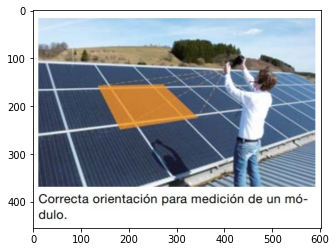

In [16]:
imagen = "res/foto.jpeg"
img = cv2.imread(imagen, cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### Solución del problema

#### Adquisición de datos
Algunas de las imágenes utilizadas serán fotografías de los paneles solares instalados en el M8B de la Facultad de Minas de la Universidad Nacional de Colombia, tomadas con un cámara térmica UTi165A. Las fotografías fueron tomadas a los paneles solares instalados y en funcionamiento durante el día, permitiendo diferenciar los niveles de la temperatura de incidencia sobre los paneles solares, con el fin de poder observar y analizar los puntos que resalten en las imágenes en áreas específicas con altas temperaturas. Estas fotografías fueron aportadas por la empresa Solenium, y tomadas a los paneles a los cuales se les desea realizar el análisis del estado funcional y comprobar que no contengan fallas en las celdas.

Otra parte de las imágenes utilizadas serán de un banco de datos de imágenes térmicas encontradas en Internet. A partir de las cuales se busca detectar fallas mediante una relación entre la escala de temperatura y el color de las imágenes.

#### Procesamiento de las imágenes
Para la parte del procesamiento de imágenes lo que se busca es mejorar la calidad de la imagen para poder ser utilizada en etapas posteriores, ya sea eliminando el ruido, mejorando el contraste de las imágenes o perfilando la imagen. 

Se procedió a utilizar un método para convertir las imágenes de un espacio de color a otro y analizar la información que se podía obtener a partir de la imágen en cada uno de los canales analizados. Finalmente, se procedió a obtener los histogramas de las imágenes y analizar sus espacios de colores.


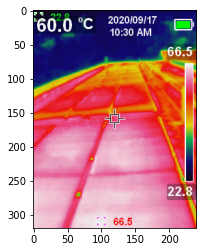

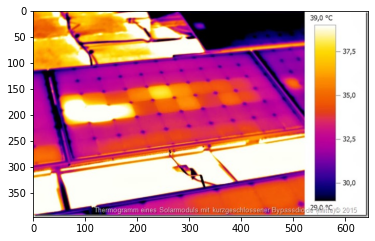

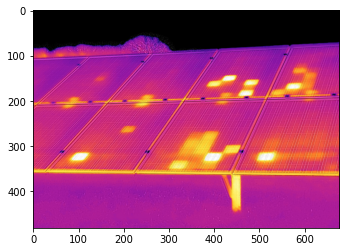

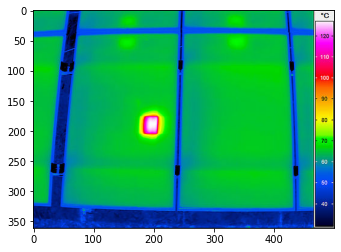

In [21]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
#Leer y plotear la imagen de trabajo
images = ["res/4.bmp", "res/2.jpg", "res/3.png","res/5.jpg"]
for x in images:
    img = cv2.imread(x, cv2.IMREAD_COLOR)
    img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

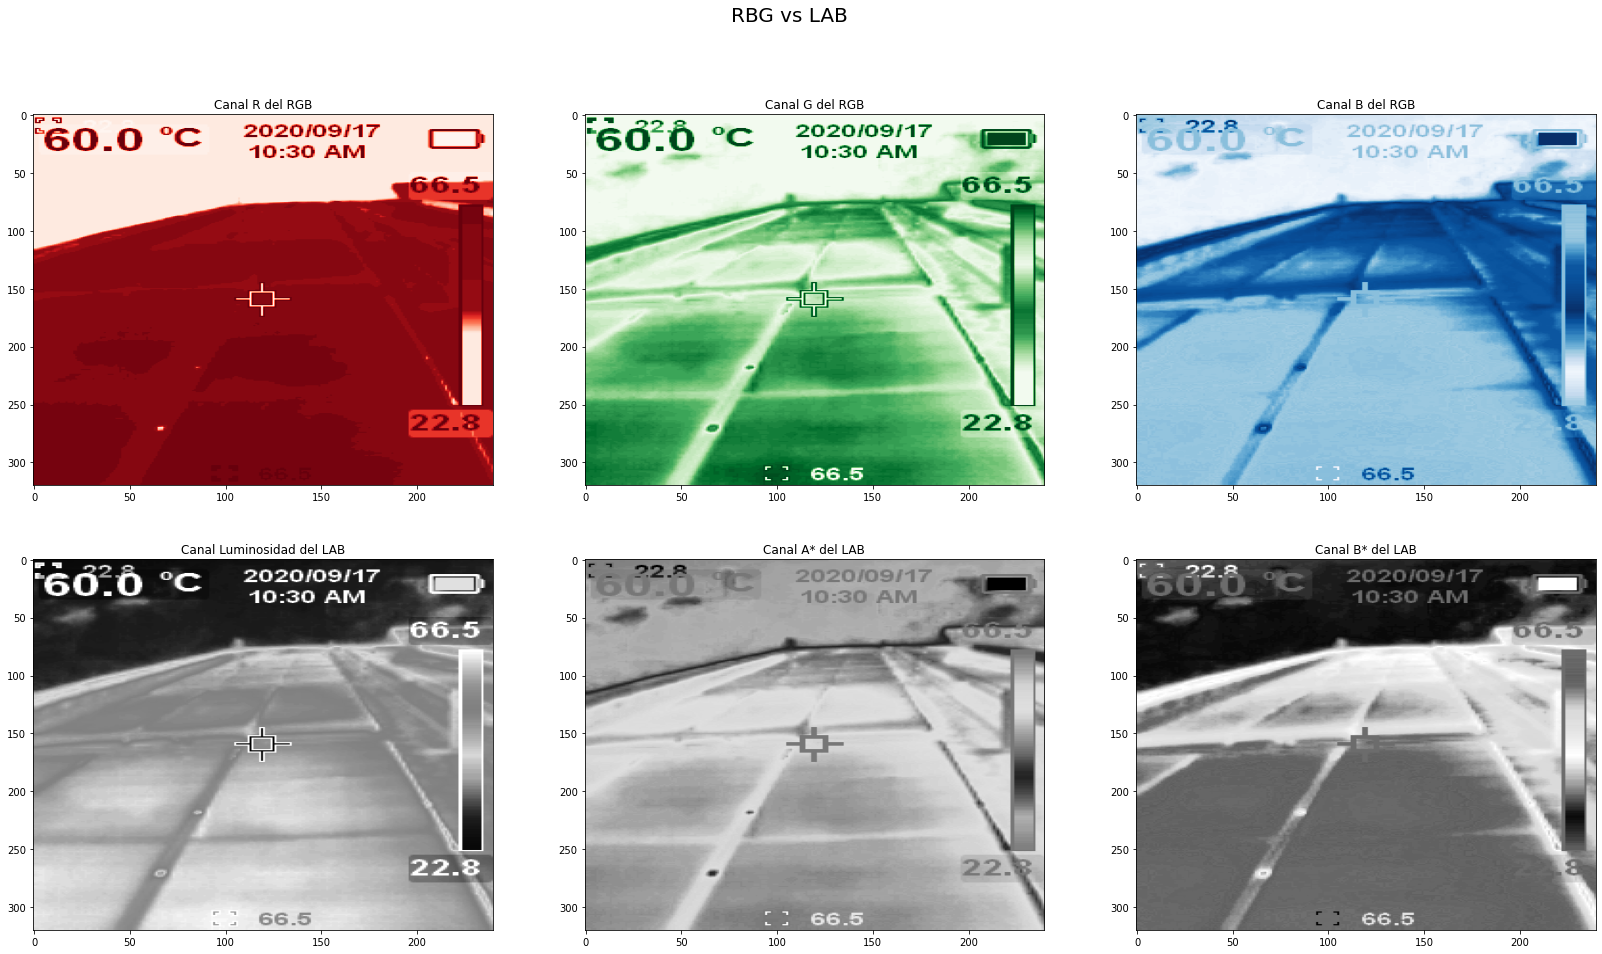

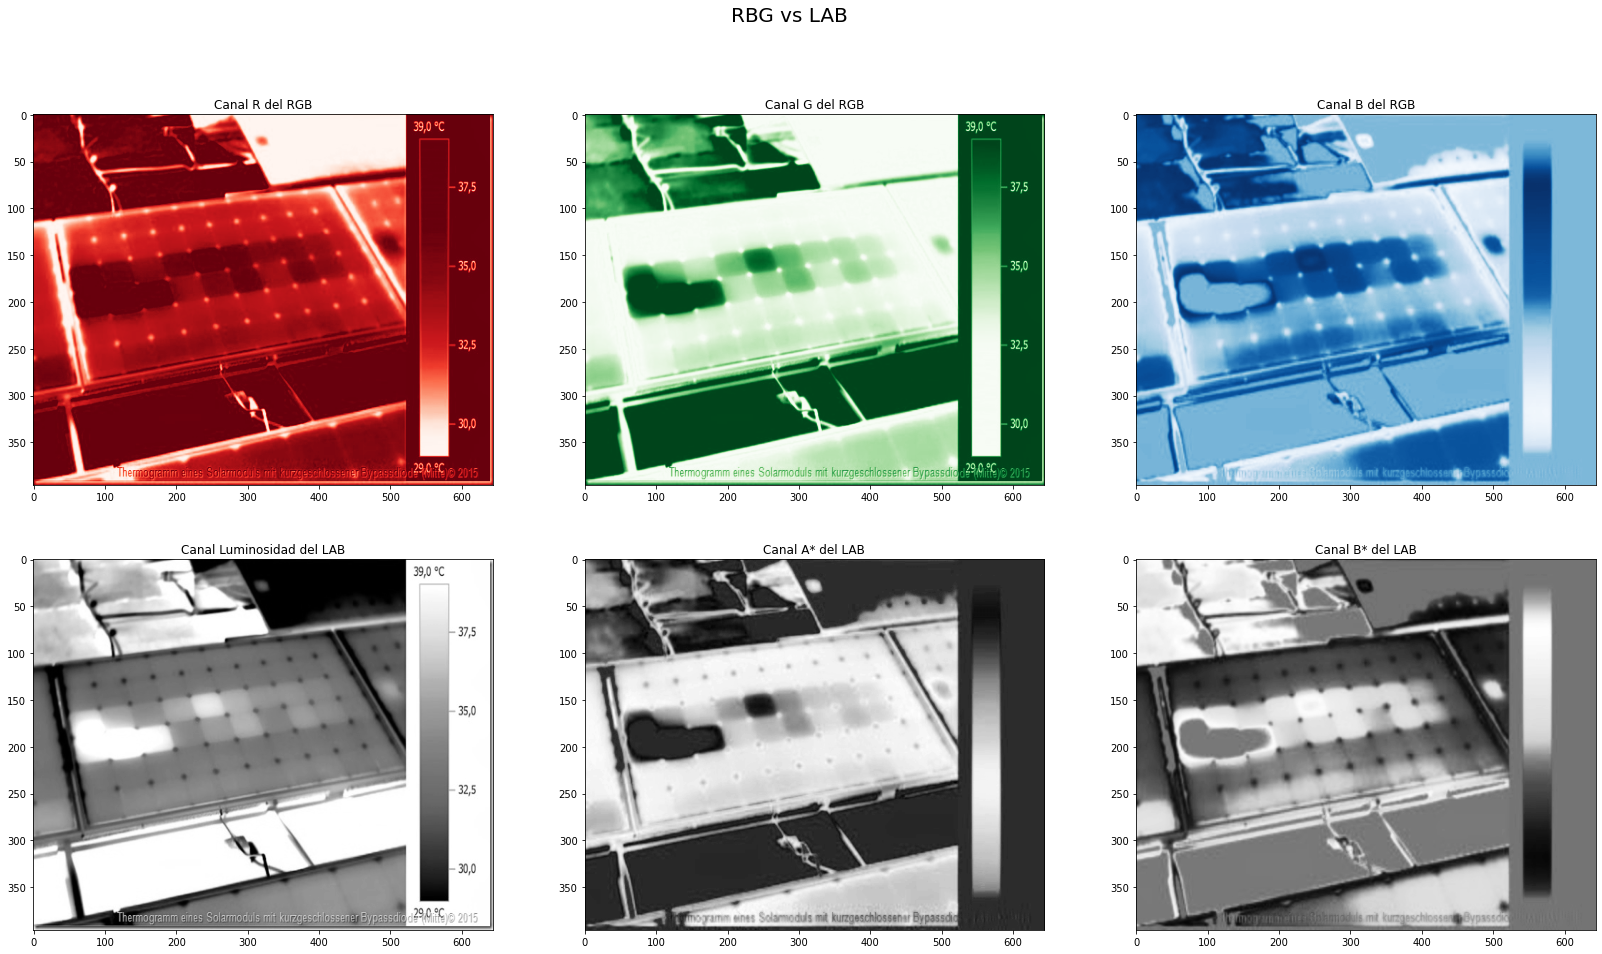

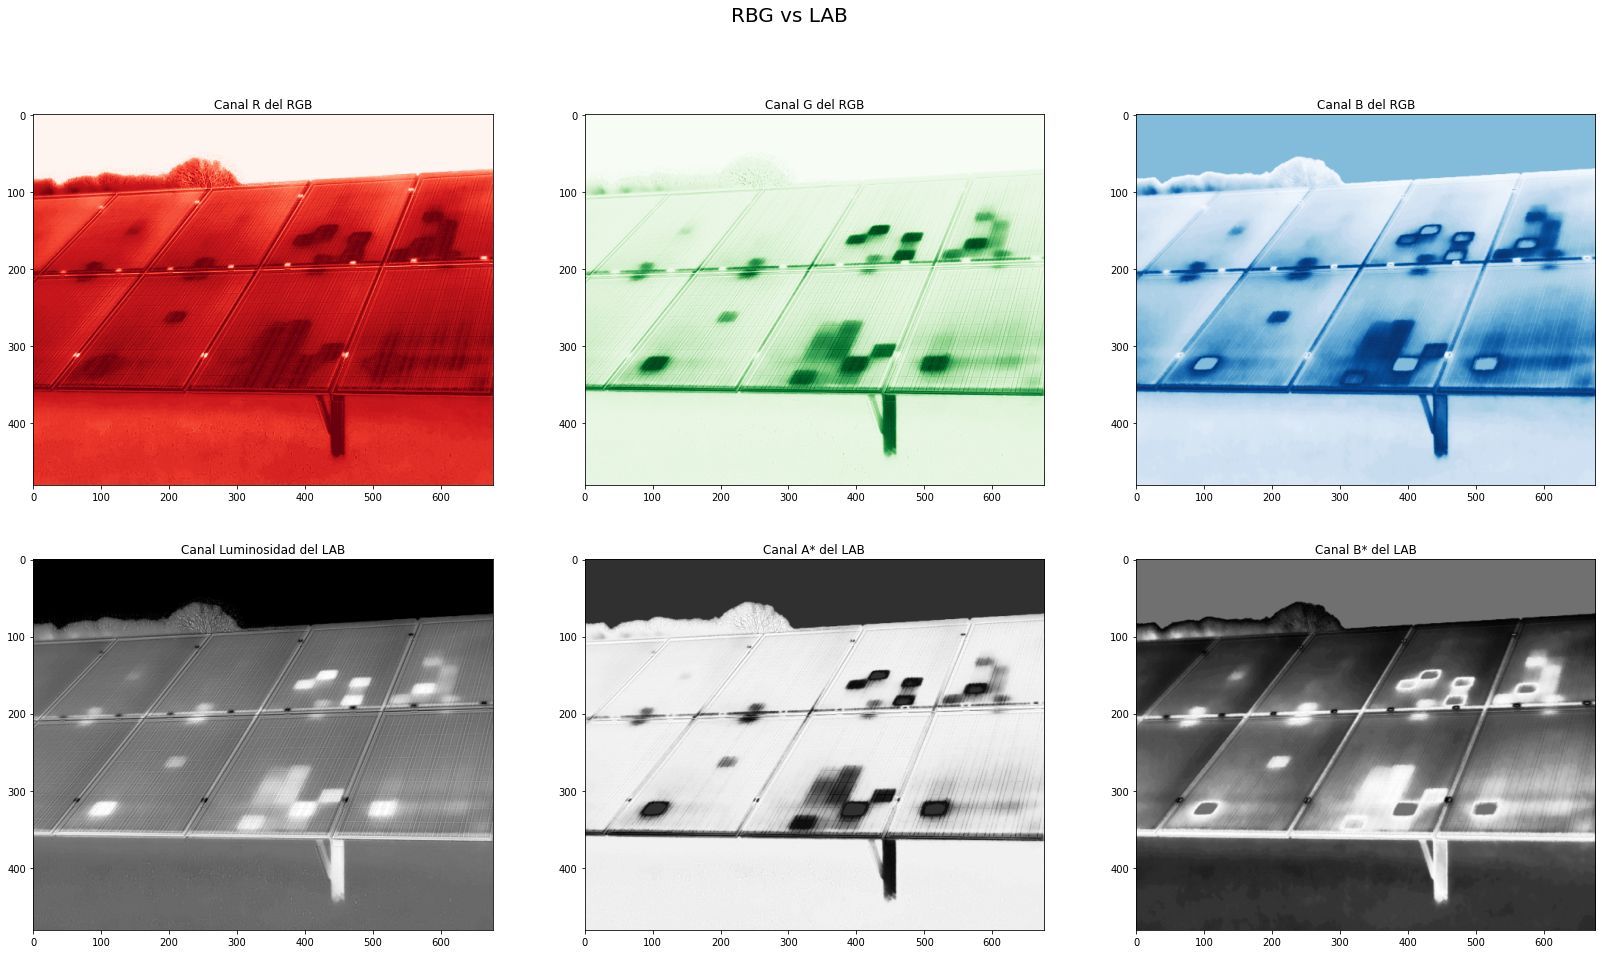

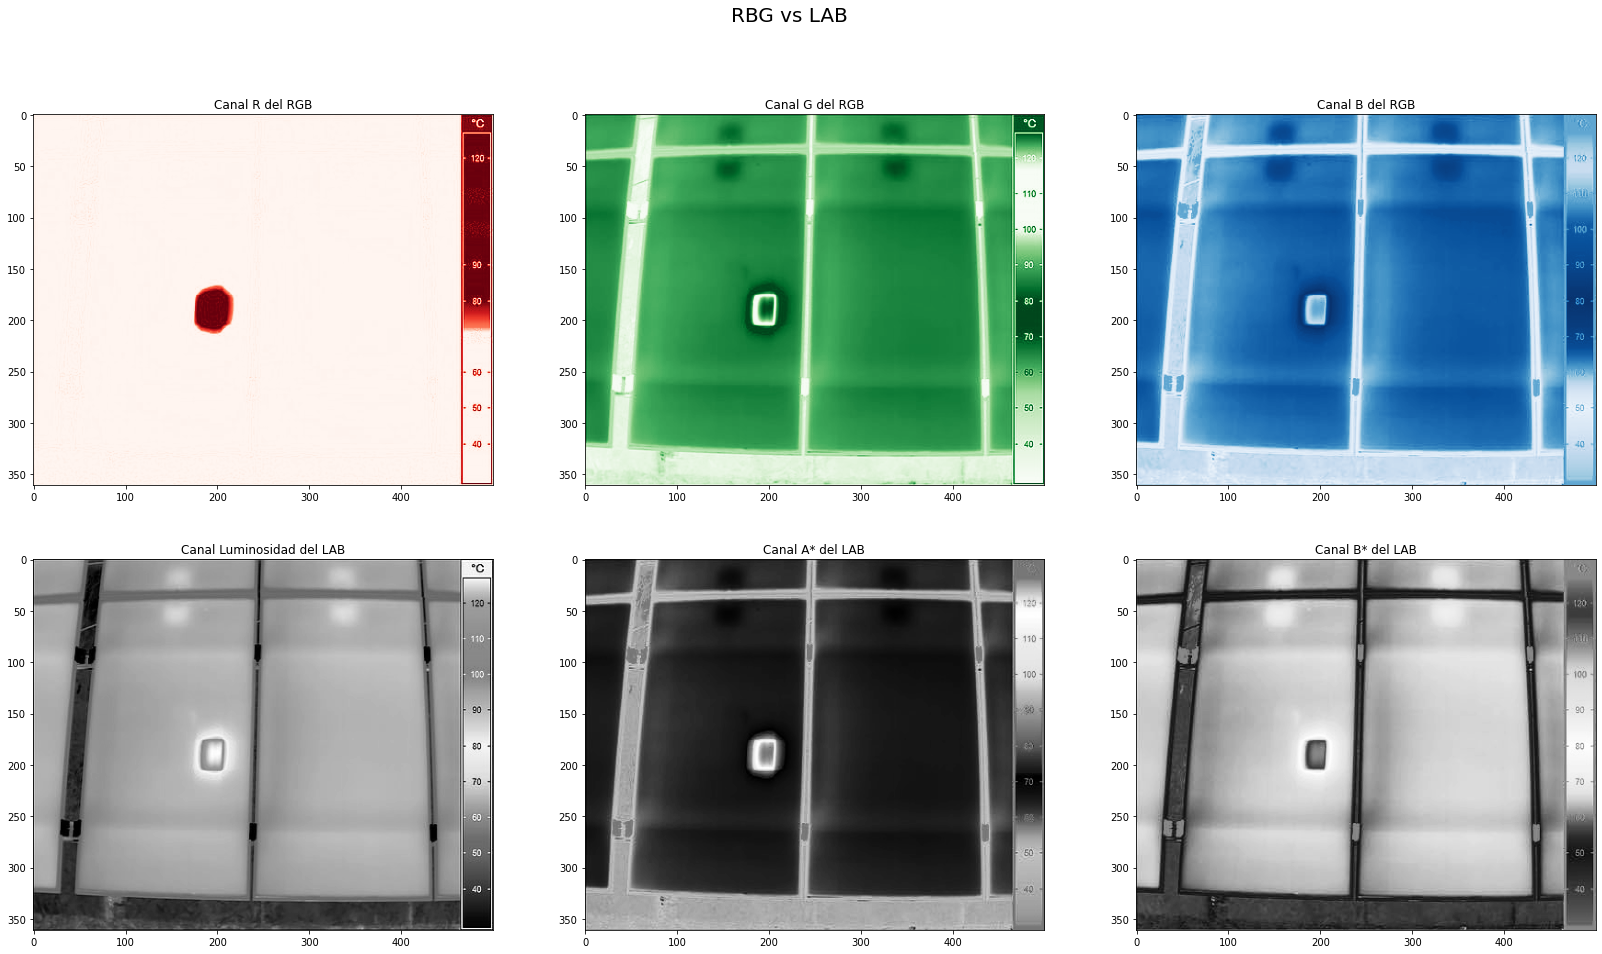

In [22]:
 for x in images:
    img = cv2.imread(x, cv2.IMREAD_COLOR)   
    img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_R = img_rgb[:,:,0]
    img_G = img_rgb[:,:,1]
    img_B = img_rgb[:,:,2]
    img_lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    img_L = img_lab[:,:,0]
    img_A =  img_lab[:,:,1]
    img_B = img_lab[:,:,2]
    #Canal RGB vs LAB
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
    fig.suptitle('RBG vs LAB', fontsize=20)
    ax1.set_title('Canal R del RGB')
    ax1.imshow(img_R, cmap='Reds', aspect='auto')
    ax2.set_title('Canal G del RGB')
    ax2.imshow(img_G, cmap='Greens', aspect='auto')
    ax3.set_title('Canal B del RGB')
    ax3.imshow(img_B, cmap='Blues', aspect='auto')
    ax4.set_title('Canal Luminosidad del LAB')
    ax4.imshow(img_L, cmap='gray', aspect='auto')
    ax5.set_title('Canal A* del LAB')
    ax5.imshow(img_A, cmap='gray', aspect='auto')
    ax6.set_title('Canal B* del LAB')
    ax6.imshow(img_B, cmap='gray', aspect='auto')

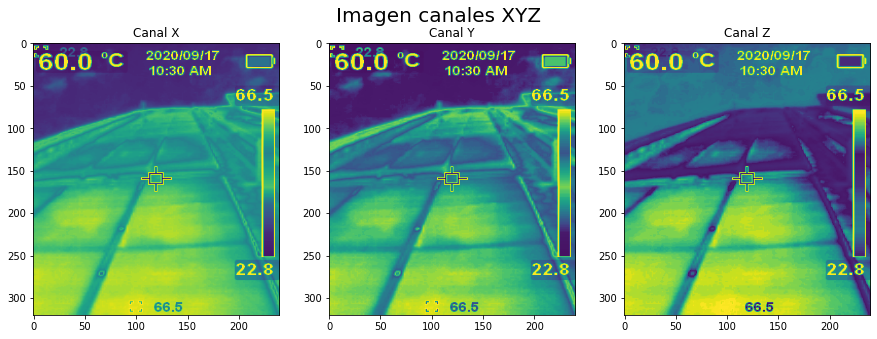

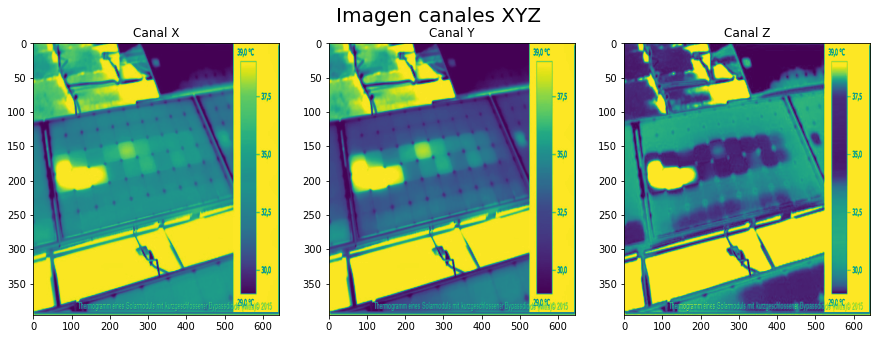

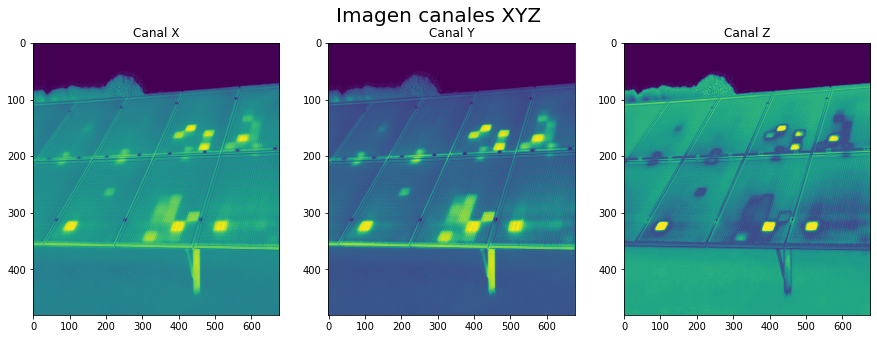

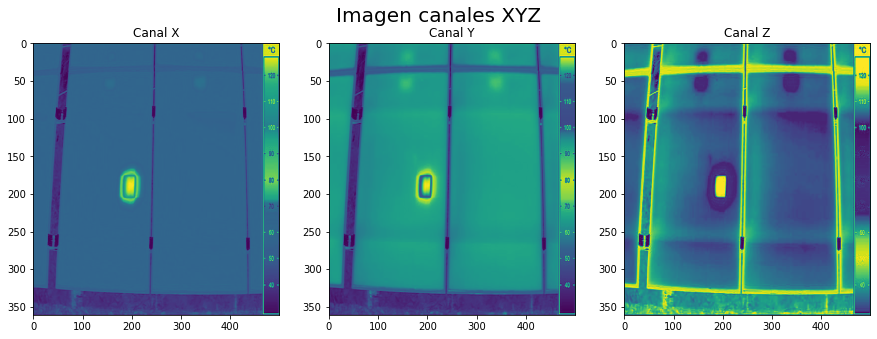

In [23]:
 for x in images:
    img = cv2.imread(x, cv2.IMREAD_COLOR) 
    img_xyz  = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
    img_X = img_xyz[:,:,0]
    img_Y =  img_xyz[:,:,1]
    img_Z = img_xyz[:,:,2]
    #Canal XYZ
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))
    fig.suptitle('Imagen canales XYZ', fontsize=20)
    ax1.set_title('Canal X')
    ax1.imshow(img_X, aspect='auto')
    ax2.set_title('Canal Y')
    ax2.imshow(img_Y,  aspect='auto')
    ax3.set_title('Canal Z')
    ax3.imshow(img_Z,  aspect='auto')


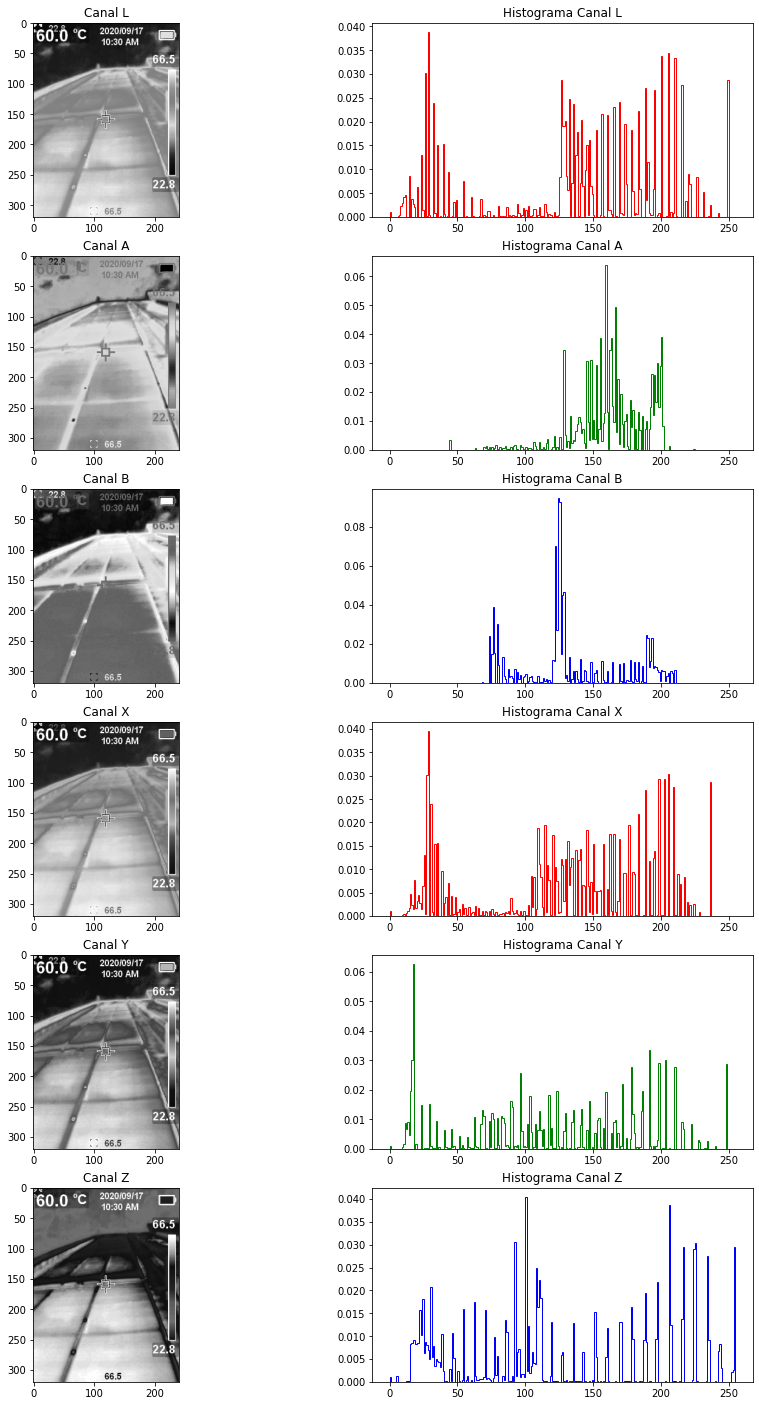

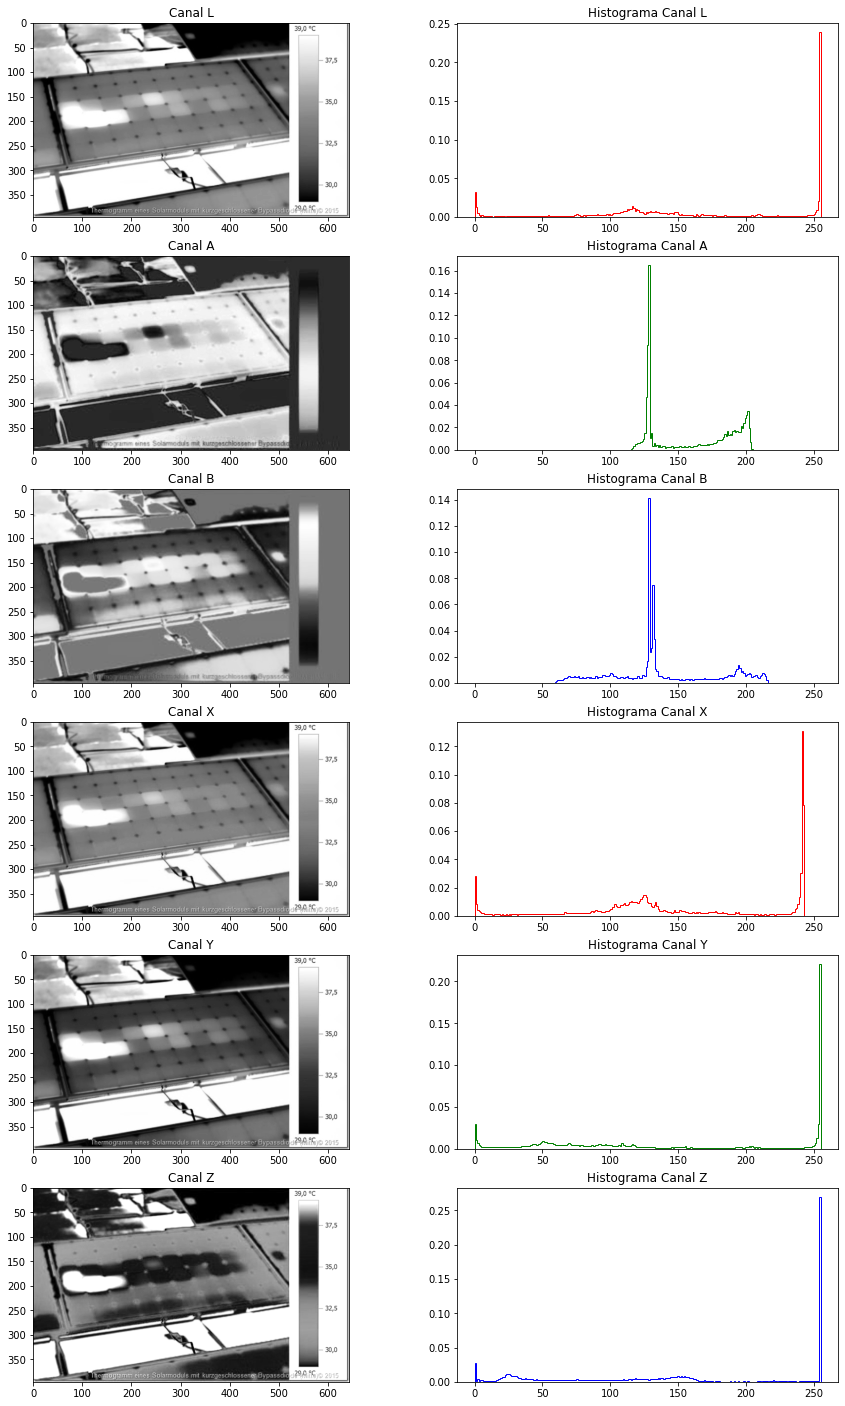

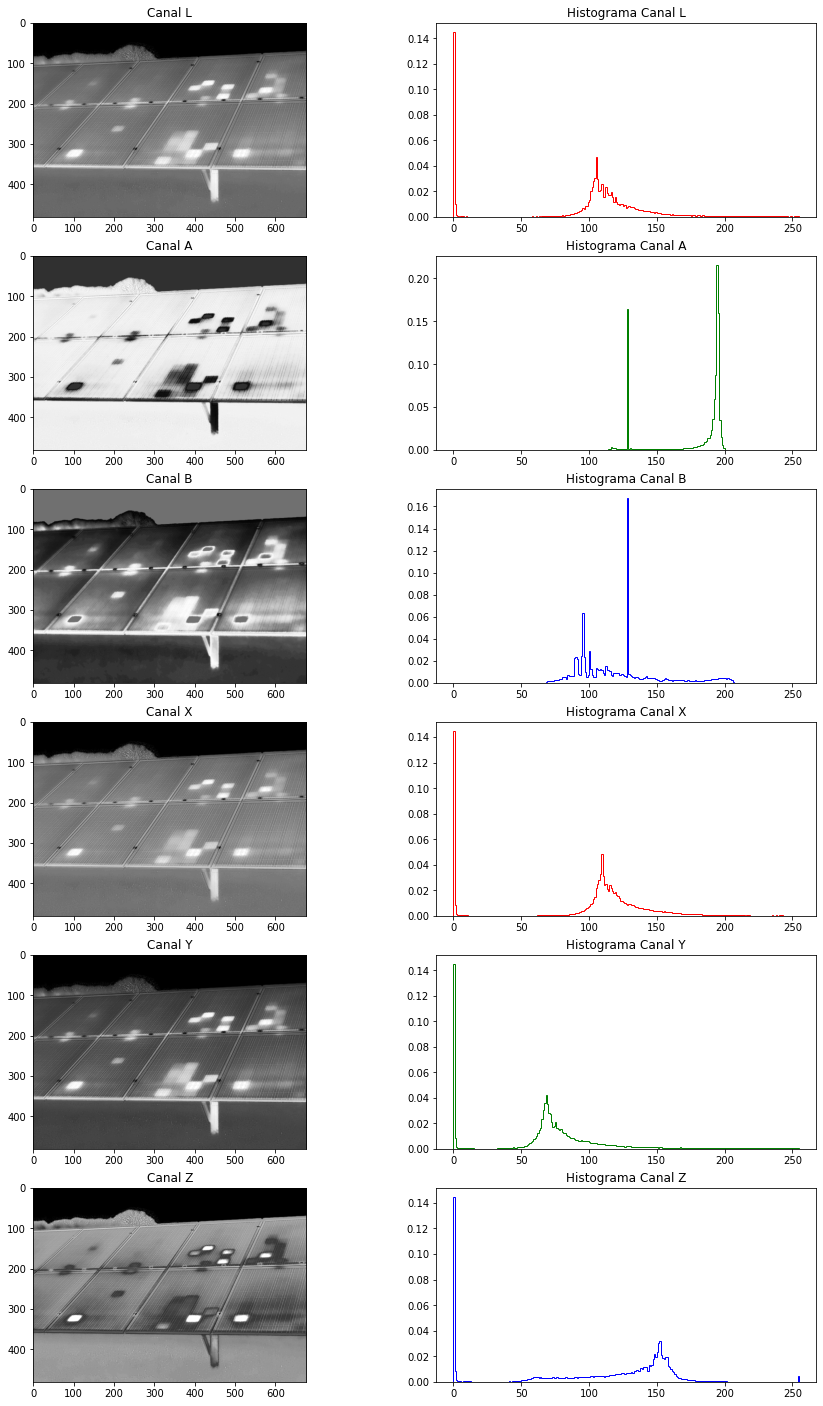

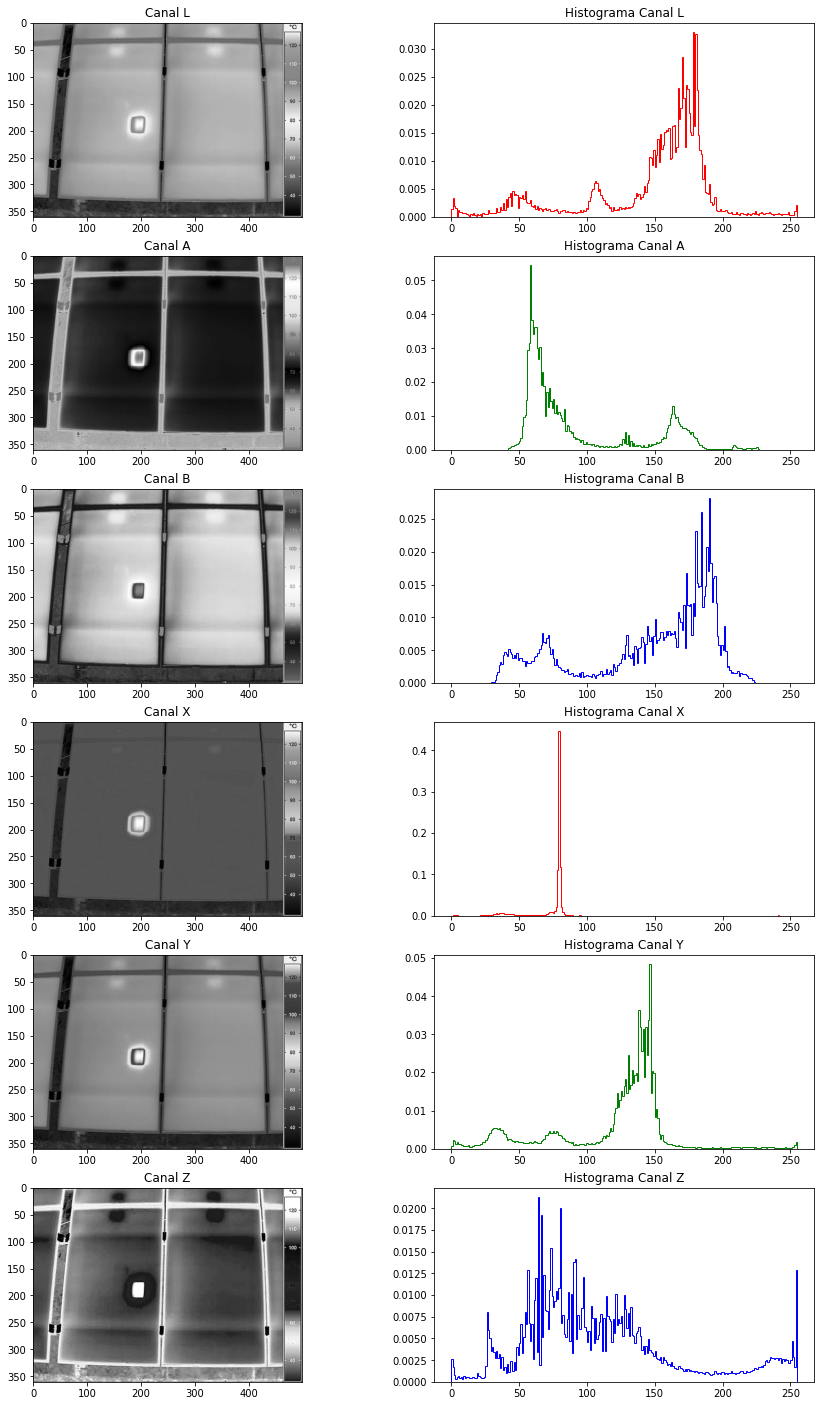

In [24]:
for x in images:
    img = cv2.imread(x, cv2.IMREAD_COLOR) 
    img_lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    img_L = img_lab[:,:,0]
    img_A =  img_lab[:,:,1]
    img_B = img_lab[:,:,2]
    img_xyz  = cv2.cvtColor(img, cv2.COLOR_BGR2XYZ)
    img_X = img_xyz[:,:,0]
    img_Y =  img_xyz[:,:,1]
    img_Z = img_xyz[:,:,2]
    fig, arreglo_plots = plt.subplots(6,2, figsize=(15, 25))
    colors = ('r','g','b')
    #Canal LAB
    arreglo_plots[0,0].set_title('Canal L')
    arreglo_plots[0,0].imshow(img_L, cmap="gray")
    arreglo_plots[0,1].set_title('Histograma Canal L')
    img_array_i = img_lab[:,:,0].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[0])

    arreglo_plots[1,0].set_title('Canal A')
    arreglo_plots[1,0].imshow(img_A, cmap="gray")
    arreglo_plots[1,1].set_title('Histograma Canal A')
    img_array_i = img_lab[:,:,1].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[1])

    arreglo_plots[2,0].set_title('Canal B')
    arreglo_plots[2,0].imshow(img_B, cmap="gray")
    arreglo_plots[2,1].set_title('Histograma Canal B')
    img_array_i = img_lab[:,:,2].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[2])

    #Canal XYZ
    arreglo_plots[3,0].set_title('Canal X')
    arreglo_plots[3,0].imshow(img_X, cmap="gray")
    arreglo_plots[3,1].set_title('Histograma Canal X')
    img_array_i = img_xyz[:,:,0].ravel()
    arreglo_plots[3,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[0])

    arreglo_plots[4,0].set_title('Canal Y')
    arreglo_plots[4,0].imshow(img_Y, cmap="gray")
    arreglo_plots[4,1].set_title('Histograma Canal Y')
    img_array_i = img_xyz[:,:,1].ravel()
    arreglo_plots[4,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[1])

    arreglo_plots[5,0].set_title('Canal Z')
    arreglo_plots[5,0].imshow(img_Z, cmap="gray")
    arreglo_plots[5,1].set_title('Histograma Canal Z')
    img_array_i = img_xyz[:,:,2].ravel()
    arreglo_plots[5,1].hist(img_array_i,histtype='step', bins=255, 
                                range=(0.0, 255.0),density=True, color=colors[2]);

# Analizando los diferentes resultados para cada uno de los canales analizados, para cada una de las imágenes utilizadas, se cree que el espacio de color LAB es el más adecuado, para las imágenes de los canales X y L, los cuales se analizaran con mayor detenimiento y cuidado para implementar la parte de segmentación.

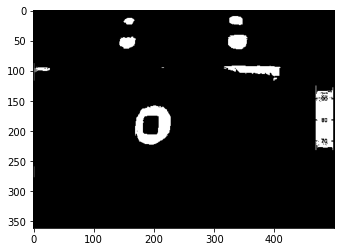

In [30]:
ret,thresh2 = cv2.threshold(img_B,200,55,cv2.THRESH_BINARY)
plt.imshow(thresh2, cmap='gray')

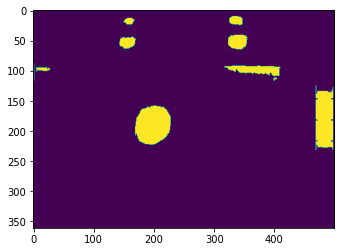

In [31]:
from skimage import morphology as morph

#selem = morph.rectangle(100,100)
#res = morph.closing(thresh2, selem)
#plt.imshow(res)
thresh2 = thresh2/255
res = morph.remove_small_holes(thresh2.astype(bool), area_threshold = 1000)
res = morph.remove_small_objects(res, min_size = 20)
plt.imshow(res)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Numero de etiquetas detectadas: 8


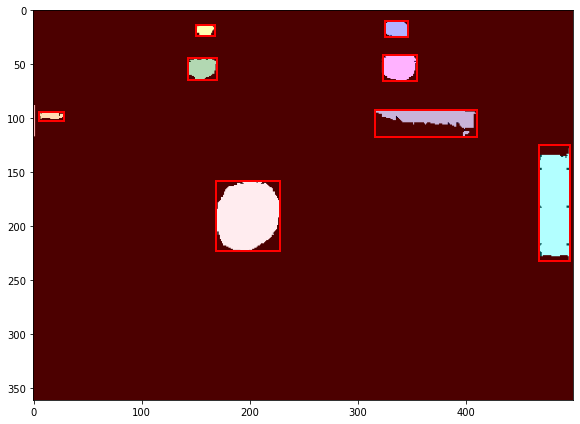

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb


image = res

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
i = 0
for region in regionprops(label_image):
    i += 1
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle 
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

#ax.set_axis_off()
plt.tight_layout()
print('Numero de etiquetas detectadas: ' + str(i))
plt.show();